<a href="https://colab.research.google.com/github/sushiiel22bds0390/prettiere22/blob/main/LinearSvc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy for 0.4 test_size: 78.8961038961039 %
Accuracy for 0.3 test_size: 77.92207792207793 %
Accuracy for 0.2 test_size: 82.46753246753246 %


[Text(0.5, 0, 'Test Size Ratio'),
 Text(0, 0.5, 'Accuracy'),
 Text(0.5, 1.0, 'Accuracy Graph for LinearSVC')]

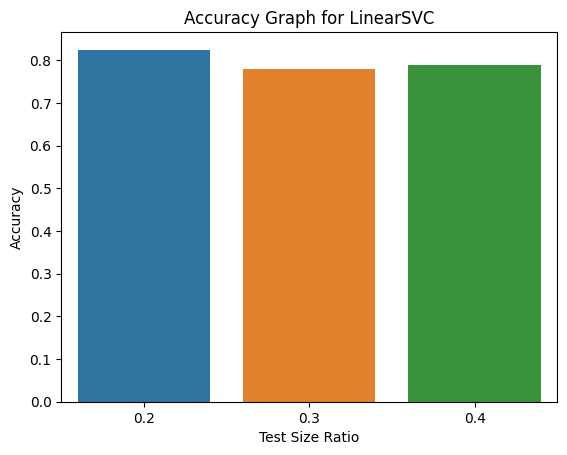

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import seaborn as sns
dataset = pd.read_csv("/content/sample_data/diabetes 2.csv")
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
test_sizes = [0.4, 0.3,0.2]
data_sets = {}
for test_size in test_sizes:
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=test_size, random_state=0)
    data_sets[test_size] = {
        "xtrain": xtrain,
        "xtest": xtest,
        "ytrain": ytrain,
        "ytest": ytest,
    }
accuracy_map = {}
for test_size, data in data_sets.items():
    sc_x = StandardScaler()
    xtrain = sc_x.fit_transform(data['xtrain'])
    xtest = sc_x.transform(data['xtest'])
    classifier = LinearSVC(random_state=0,max_iter=100000)
    classifier.fit(xtrain, data['ytrain'])
    y_pred = classifier.predict(xtest)
    accuracy_map[test_size] = accuracy_score(data['ytest'], y_pred)
    print(f"Accuracy for {test_size} test_size:", accuracy_map[test_size] * 100, "%")


data = pd.DataFrame(accuracy_map.items(), columns=['Test Size Ratio', 'Accuracy'])
graph = sns.barplot(x='Test Size Ratio', y='Accuracy', data=data)
graph.set(xlabel='Test Size Ratio', ylabel='Accuracy', title='Accuracy Graph for LinearSVC')
